## Práctica 4: Rubén Gómez Blanco y Adrián Sanjuán Espejo

In [1]:
import numpy as np
from pandas.io.parsers import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import integrate
from sklearn.preprocessing import PolynomialFeatures
from numpy import arange, meshgrid, sqrt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de los datos

En primer lugar cargamos los datos y visualizamos las primeras instancias para ver el aspecto que tienen.

In [2]:
#Cargamos y visualizamos las 5 primeras instancias de los datos
data = read_csv('/content/drive/MyDrive/AA/p4/data4.csv', header=None).to_numpy()
print('Número de instancias en el dataset:')
print(len(data))
print('Muestra de las 5 primeras instancias de los datos:')
print(data[0:5])


Número de instancias en el dataset:
118
Muestra de las 5 primeras instancias de los datos:
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


In [5]:
#Cargamos columna 0 y 1 (los atributos) en x
x = data[:,0:2]
# Guardamos en Y un array con los valores de la variable objetivo para cada instancia
Y = data[:,2]

print("Muestra de la variable objetivo o target (variable a predecir):")
print(Y[55:60])


Muestra de la variable objetivo o target (variable a predecir):
[1. 1. 1. 0. 0.]


# Visualización de los datos

Antes de crear el modelo procedemos a visualizar los datos con respecto a las dos columnas de atributos originales.

Text(0, 0.5, 'Microchip test 2')

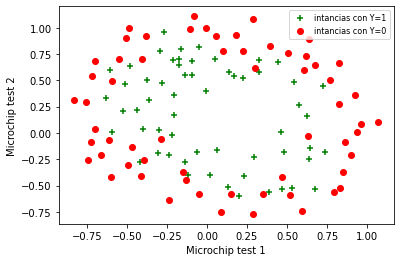

In [45]:
# Obtiene un vector con las instancias con variable objetivo igual a 1
pos = np.where(Y == 1)
# Obtiene un vector con las instancias con variable objetivo igual a 0
pos_n = np.where(Y == 0)
# Dibuja los ejemplos iguales a 1
plt.scatter(x[:,0][pos], x[:,1][pos],marker= '+', c='g')
# Dibuja los ejemplos iguales a 0
plt.scatter(x[:,0][pos_n], x[:,1][pos_n],marker= 'o', c='r')

plt.legend(['intancias con Y=1','intancias con Y=0'],prop={'size': 8})
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')

# Creación del modelo

Para obtener nuestro modelo hay que definir una serie de funciones:
  - función: Calcula el valor de la función polinomial.
  - sigmoid: Calcula la función sigmoide.
  - calcula_coste_vec: Calcula la función de coste.
  - derivada_w_vec: Calcula la derivada de la función de coste con respecto al coeficiente i-ésimo (con regularización).
  - derivada_b_vec: Calcula la derivada de la función de coste con respecto a b (con regularización).
  - descenso_gradiente_vec: Utilizando las funciones anteriores aplica el algoritmo de descenso de gradiente para optimizar los valores de los coeficiente w y b (con regularización).



Antes de comenzar a definir las funciones anteriores procedemos a aplicar la transformación polinomial de grado 6 a nuestros datos. La transformación dara lugar a un array con cada uno de los términos de un polinomio de grado 6 y dos variable en función del valor de estas dos últimas. Por tanto, tras la transformación deberíamos obtener 28 columnas.

In [10]:
#Aplicamos la transformacion polinomial de grado 6 a nuestros datos
poly = PolynomialFeatures(6)
pol = poly.fit_transform(x)
#print(pol)
#Guardamos los datos por columnas lo cual nos facilitará calculos posteriores
X=[pol[:,i] for i in range(28)]
print("Número de columnas: ",len(X))

Número de columnas:  28


In [11]:
def funcion(x,w,b):
  '''Calcula el valor de la función polinomial dado
  un array de coeficientes w, un término independiente b y un array X de
  columnas con la transformación polinomial ya aplicada a los datos'''
  arr = np.concatenate(([b],w))
  #Devolvemos el producto escalar de los coeficientes por la transformación 
  #polinomial de las variables originales
  return np.dot(arr,x)

In [13]:
# Inicializamos unos valores para w y b para probar la función
w = np.zeros(27)
b = 0
funcion(X,w,b)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
def sigmoid(z):
  '''Devuelve el valor de la función sigmoide aplicado a un determinado z'''
  return 1 / (1 + np.exp(np.subtract(0,z)))

def calcula_coste_vec(w,b,f,reg_coef):
  '''Dados un array de coeficientes w, un término independiente b, una función
   f y un coeficiente de regularización reg_coef calcula la función de coste 
   con respecto de los datos cargados en X y en Y'''
  sumatorio=0
  m=len(X[0])

  sumatorio = np.dot(Y,np.log(sigmoid(f(X,w,b)))) + np.dot(np.subtract(1,Y),np.log(np.subtract(1,sigmoid(f(X,w,b)))))
  sumatorio = -(1/m)*sumatorio
  sumatorio += (reg_coef / (2*m)) * np.sum(np.power(w,2))
  #sumatorio += (reg_coef / (2*m)) * (b**2)
  return sumatorio

#print(calcula_coste_vec(w,b,funcion,1))

In [18]:
def derivada_w_vec(w,i,b,f,reg_coef):
  '''Dado un índice i calcula la derivada de la función de coste anterior
  con respecto del coeficiente w[i]'''
  sumatorio=0
  m=len(X[0])
  sumatorio = np.sum(np.dot(np.subtract(sigmoid(f(X,w,b)),Y),X[i+1]))
  total = sumatorio*(1/m)
  total += (reg_coef/m)*w[i]
  return total

def derivada_b_vec(w,b,f):
  '''Calcula la derivada de la función de coste anterior con respecto del
  término independiente b'''
  sumatorio=0
  m=len(X[0])
  sumatorio = np.sum(np.subtract(sigmoid(f(X,w,b)),Y))
  total = sumatorio*(1/m)
  return total


In [19]:
def descenso_gradiente_vec(w,b,reg_coef,alpha,f,num_it):
  '''Dados un array de coeficientes w, un término independiente b, un 
  coeficiente regularización reg_coef, una tasa de aprendizaje alpha, una 
  función f y un número de iteraciones num_it aplica la técnica de descenso de 
  gradiente durante num_it iteraciones para optimizar los valores de w y b que 
  minimicen la función de coste.'''  

  #Array con el coste obtenido en cada iteración
  costes= []
  #Valores de w y b que irán actualizandose
  nueva_w = w
  nueva_b = b
  #Valores de w y b para los que se minimiza la función de coste
  min_w = w
  min_b = b

  min_cost = 1000

  for i in range(num_it):
    
    #Computamos las derivadas con respecto a cada coeficiente
    der_w=[]
    for j in range(27):
      der_w.append(derivada_w_vec(nueva_w,j,nueva_b,f,reg_coef))
    der_b = derivada_b_vec(nueva_w,nueva_b,f)
    
    #Calculamos el nuevo valor de los coeficientes de w y b
    nueva_w = np.subtract(nueva_w,np.dot(alpha,der_w))
    nueva_b= nueva_b - alpha*der_b

    #Calculamos el coste para los nuevos valores y actualizamos w y b 
    #si se minimiza el coste
    cost = calcula_coste_vec(nueva_w,nueva_b,f,reg_coef)
    costes.append(cost)
    if i > 0:
        if cost < min_cost:
          min_cost = cost
          min_w = nueva_w
          min_b = nueva_b
    else:
      min_cost = cost

  return costes, min_w, min_b



In [20]:
def acc(X,Y,min_w, min_b, umbral):
  '''Dado un array de instancias X, un array Y con el target, un vector de 
  coeficientes min_w, un término independiente min_b y un umbral calcula la 
  precisión del modelo con min_w y min_b con respecto de los datos X'''
  #Realizamos la predicción
  pred = sigmoid(funcion(X,min_w,min_b))
  #Calculamos cuantas predicciones están por encima del umbral para
  #predecir 1 o 0
  pred_bool  = pred >= umbral
  #Devolvemos el porcentaje de predicciones que coinciden con el valor del 
  #target
  return np.sum(pred_bool == Y) / len(Y)

A continuación utilizamos el descenso de gradiente para obtener diferentes modelos, es decir, diferentes valores para w y b que minimicen la función de coste. Los modelos van a utilizar una misma tasa de aprendizaje (alpha = 0.1) pero experimentaremos con diferentes valores del coeficiente de regularización para observar como afecta este valor a la función de coste y a la precisión.

In [21]:
#Valores del coeficiente de regularización
reg_coef_array = [0,0.0001,0.1,1,5,10]

alpha = 0.1
umbral = 0.5

#Arrays en los que guardaremos los modelos y las métricas de cada uno de los
#modelos
costes_array = []
min_w_array = []
min_b_array = []
acc_array = []

#Aplicamos el descenso de gradiente para cada uno de los reg_coef
for reg_coef in reg_coef_array:
  costes, min_w, min_b = descenso_gradiente_vec(w, b, reg_coef,alpha,funcion,8000)
  print('Reg_coef = {}, finished'.format(reg_coef))
  costes_array.append(costes)
  min_w_array.append(min_w)
  min_b_array.append(min_b)
  acc_array.append(acc(X,Y,min_w,min_b,umbral))
  #print(min_w)
  #print(min_b)

Reg_coef = 0, finished
Reg_coef = 0.0001, finished
Reg_coef = 0.1, finished
Reg_coef = 1, finished
Reg_coef = 5, finished
Reg_coef = 10, finished


Text(0.5, 1.0, 'Evolución del coste en función del coeficiente regularización\n (tasa de aprendizaje = 0.1)')

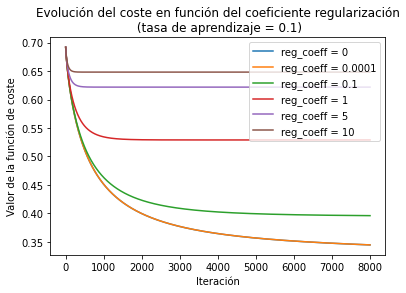

In [24]:
colors = ['blue','orange','green','red','black','purple']
for i in range(len(costes_array)):
  plt.plot(costes_array[i])
plt.legend(["reg_coeff = 0", "reg_coeff = 0.0001","reg_coeff = 0.1","reg_coeff = 1","reg_coeff = 5","reg_coeff = 10"], loc ="upper right")
plt.ylabel('Valor de la función de coste')
plt.xlabel('Iteración')
plt.title('Evolución del coste en función del coeficiente regularización\n (tasa de aprendizaje = 0.1)')

En la visualización de las funciones de coste para cada valor del coeficiente de regularización se puede apreciar claramente como afecta al modelo. Vemos que cuanto mayor es el coeficiente de regularización antes converge la función de coste y a valores más altos. Es decir, con valores altos de reg_coef obtenemos costes mucho más altos que con valores bajos, lo que a priori podríamos pensar que es negativo. Sin embargo un valor de la función de coste con respecto de los datos de entrenamiento demasiado bajo (cercano a 0) podría indicar cierto sobreaprendizaje, es decir, el modelo se está ajustando demasiado a los datos específicos de entrenamiento en vez de generalizar. Por otro lado un valor de la función de coste demasiado alto podría causar el efecto contrario ya que está generalizando demasiado obteniendo un modelo inútil.
Por lo anterior, llegamos a la conclusión de que un coeficiente de regularización de 0.1 es un buen valor ya que evita en cierta medida el sobreaprendizaje pero no aumenta demasiado el valor mínimo de la función de coste obtenido.

En la siguiente celda observamos otra métrica que nos puede ayudar también a decidir el valor de reg_coeff más adecuado.

In [25]:
for i in range(len(acc_array)):
  print("Lambda (reg_coef) = {} -> accuracy: {}%  minimum cost: {} ".format(reg_coef_array[i],round(acc_array[i]*100,2), min(costes_array[i])))

Lambda (reg_coef) = 0 -> accuracy: 83.9%  minimum cost: 0.34462349110314777 
Lambda (reg_coef) = 0.0001 -> accuracy: 83.9%  minimum cost: 0.3446918749781607 
Lambda (reg_coef) = 0.1 -> accuracy: 83.05%  minimum cost: 0.3960447042644869 
Lambda (reg_coef) = 1 -> accuracy: 83.05%  minimum cost: 0.5290027312929225 
Lambda (reg_coef) = 5 -> accuracy: 81.36%  minimum cost: 0.6218278591018653 
Lambda (reg_coef) = 10 -> accuracy: 74.58%  minimum cost: 0.648215701445808 


Text(0.5, 1.0, 'Precisión del modelo en función del coeficiente de regularización\n (tasa de aprendizaje = 0.1)')

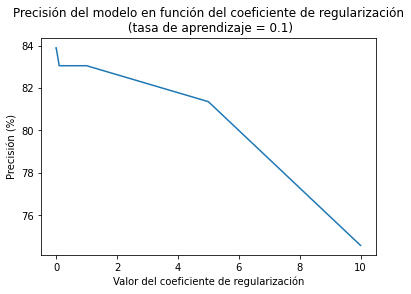

In [32]:
plt.plot(reg_coef_array,np.dot(acc_array,100))
plt.ylabel('Precisión (%)')
plt.xlabel('Valor del coeficiente de regularización')
plt.title('Precisión del modelo en función del coeficiente de regularización\n (tasa de aprendizaje = 0.1)')

Text(0.5, 1.0, 'Precisión del modelo en función del coeficiente de regularización\n (tasa de aprendizaje = 0.1)')

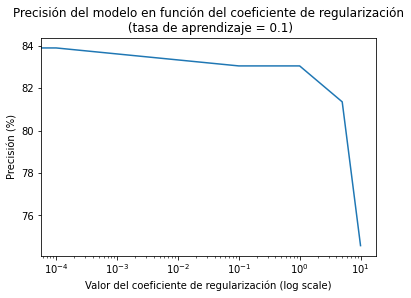

In [33]:
plt.plot(reg_coef_array,np.dot(acc_array,100))
plt.xscale('log')
plt.ylabel('Precisión (%)')
plt.xlabel('Valor del coeficiente de regularización (log scale)')
plt.title('Precisión del modelo en función del coeficiente de regularización\n (tasa de aprendizaje = 0.1)')

El accuracy calculado sobre los datos de entrenamiento calcula el porcentaje de instancias que el modelo predice bien, es decir, cuya predicción coincide con el valor del target en Y. Podemos observar que según aumenta el coeficiente de regularización el accuracy sobre los datos de entrenamiento disminuye, es decir, el modelo generaliza más. Podemos observar que para los valores de 0.1 y 1 de reg_coef, evitamos cierto sobreaprendizaje sin llegar a generalizar demasiado el modelo como sucede para reg_coef = 10

A continuación imprimimos los modelos obtenidos (valores de los coeficientes w y b) según el reg_coef con el que se han entrenado

In [34]:
for i in range(len(min_w_array)):
  print("Lambda (reg_coef) = {}:".format(reg_coef_array[i]))
  print("Vector de coeficientes w = {}".format(min_w_array[i]))
  print("Término independiente b = {}".format(min_b_array[i]))
  print('-----------------------------')

Lambda (reg_coef) = 0:
Vector de coeficientes w = [ 2.18213506  3.37752413 -4.84601888 -3.7728439  -4.53877343  0.92610629
 -1.4170497  -0.99987447 -0.27833115 -3.88944502  0.13427938 -2.01425302
 -1.38506715 -3.20166488 -0.54335352 -0.68893083  0.27146959 -1.1397553
 -1.34126942 -0.40286769 -3.02583057  0.27779579 -0.90784071  0.20963107
 -1.17269708 -0.97639492 -1.78429994]
Término independiente b = 3.081041337401868
-----------------------------
Lambda (reg_coef) = 0.0001:
Vector de coeficientes w = [ 2.18157319  3.37672079 -4.84504998 -3.77174476 -4.53768534  0.92576041
 -1.41663493 -0.99962756 -0.27828755 -3.88850792  0.13423034 -2.01371665
 -1.3846071  -3.20090824 -0.54325226 -0.68872764  0.27134197 -1.13941233
 -1.34083497 -0.40288831 -3.0250269   0.27772512 -0.90760071  0.20956947
 -1.17236438 -0.97603464 -1.78396291]
Término independiente b = 3.0804240885799508
-----------------------------
Lambda (reg_coef) = 0.1:
Vector de coeficientes w = [ 1.73598824  2.74260058 -4.0765908

Por último visualizamos los diferentes modelos obtenidos:

In [35]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """

    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [64]:
def paint(l_w,l_b,colors,title):
  '''Dado una lista de w y de b, dibuja una curva para cada modelo (obteniendo 
  el modelo i-ésimo utilizando los coeficientes w y b en l_w[i] y l_b[i]
  respectivamente). También grafica las intancias originales para observar
  como se comporta cada modelo.'''
  # Obtiene un vector con las instancias con variable objetivo igual a 1
  pos = np.where(Y == 1)
  # Obtiene un vector con las instancias con variable objetivo igual a 0
  pos_n = np.where(Y == 0)
  # Dibuja los ejemplos iguales a 1
  plt.scatter(x[:,0][pos], x[:,1][pos],marker= '+', c='g')
  # Dibuja los ejemplos iguales a 0
  plt.scatter(x[:,0][pos_n], x[:,1][pos_n],marker= 'o', c='r')
  plt.title(title)
  plt.legend(['intancias con Y=1','intancias con Y=0'],prop={'size': 8})
  plt.xlabel('Microchip test 1')
  plt.ylabel('Microchip test 2')
  plt.text(-1,-1.5,"*Los colores coiniciden con los de la gráfica de costes", color="k")
  
  for k in range(len(l_w)):
    u = np.linspace(-1, 1.3, 50)
    v = np.linspace(-1, 1.4, 50)
    
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), l_w[k]) + l_b[k])

    
    # important to transpose z before calling contour       
    z = z.T
    
    # Plot z = 0
    plt.contour(u,v,z, levels = [0.5], colors=colors[k])

  plt.show()

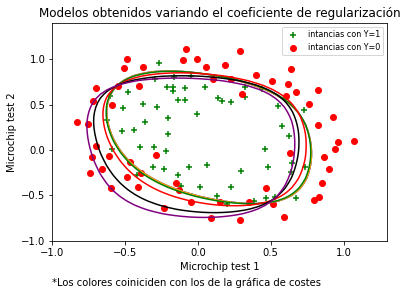

In [65]:
paint(min_w_array,min_b_array,colors,'Modelos obtenidos variando el coeficiente de regularización')


Entre los tres primeros modelos obtenidos (para reg_coef igual a 0, 0.1 y 1) no podemos observar mucha diferencia ya que el accuracy era muy parecido. Donde se aprecia una diferencia clara, es para reg_coef = 10 ya que se obtiene un modelo mucho más general que no se ajusta tanto a los datos como los otros dos.
Otra cosa que se puede observar es que el modelo para reg_coef = 0.1 (azul) no varía demasiado con respecto al de reg_coef = 0.1 (naranja), sin embargo una vez aumentamos reg_coef a 1 si que se observa un mayor cambio en la curva.

A continuación visualizamos algunos de los modelos por separado siendo el que utiliza el coeficiente de regularización de 0.1 (segunda gráfica) el que hemos considerado más adecuado atendiendo a las métricas explicadas.

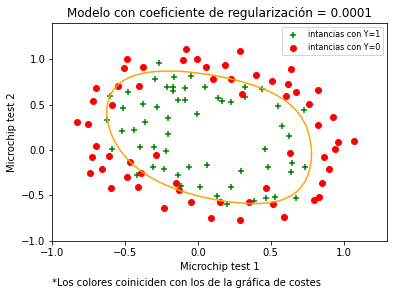

In [66]:
paint([min_w_array[1]],[min_b_array[1]],[colors[1]],'Modelo con coeficiente de regularización = 0.0001')

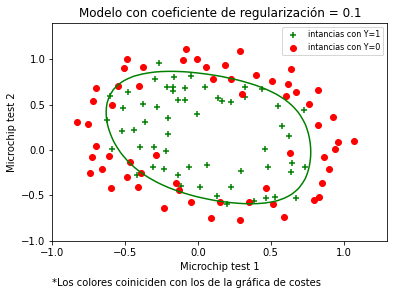

In [67]:
paint([min_w_array[2]],[min_b_array[2]],[colors[2]],'Modelo con coeficiente de regularización = 0.1')

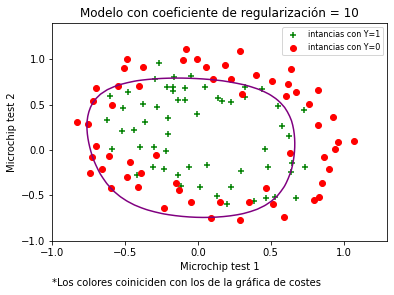

In [68]:
paint([min_w_array[5]],[min_b_array[5]],[colors[5]],'Modelo con coeficiente de regularización = 10')

Aparte del trabajo realizado, se podría utilizar un conjunto de validación para evaluar los modelos sobre datos con los que no ha sido entrenado. Esto nos daría una visión mejor del sobreaprendizaje o la excesiva generalización que ha podido afectar a nuestro modelo.